# An Introduction to BSpy

* Dr. Eric Brechner, Ally for Onlys in Tech
* Dr. Thomas Grandine, University of Washington

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
import bspy

# Instead of polynomials, let's use piecewise polynomials

* Piecewise polynomial functions are often called **splines**.
    * Allows for higher dimension function spaces without high degree polynomials
    * Supports local refinement
* Everyone knows at least one spline function

$$|x|=\begin{cases}\begin{matrix}-x\qquad\hbox{for }x<0\cr x\qquad\hbox{for }x\ge 0\cr\end{matrix}\end{cases}$$

# What is the usual spline setup

* In general, splines are defined over an interval $[t_0,t_n]$ (the **domain**).
* Intermediate points $t_i$ are chosen so that $t_0<t_1<...<t_n$ and the spline function $s$ is the collection of polynomials $p_i$ of degree $k$ satisfying

$$s(t) = p_i(t)\qquad\hbox{if }t_i\le t\lt t_{i+1}$$

* Because the polynomials are tied together at the points $t_i$, those points are usually called **knots**.
* Additionally, the polynomials frequently chosen so that the spline function is continuous

$$p_{i-1}(t_i)=p_i(t_i)$$

* Derivative conditions are also often enforced

$$p_{i-1}'(t_i)=p_i'(t_i)$$

# B-splines form a basis for a function space of splines

* Any spline function $s$ can be written as a linear combination of B-splines

$$s(t)=\sum_{i=0}^n\alpha_iB_i(t)$$

* The basis functions $B_i$ are determined by
    * The polynomial degree of the polynomials
    * The knots of the spline
    * The continuity conditions across the knots

(-0.05, 1.05, -0.14500000000000002, 0.8450000000000001)

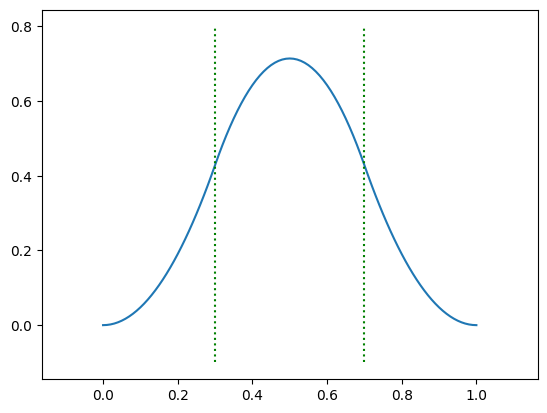

In [2]:
# The `Spline` constructor is the most basic method in BSpy

b2 = bspy.Spline(1,      # <== Number of independent variables
                 1,      # <== Number of dependent variables
                 [3],    # <== Polynomial order in each independent variable
                 [5],    # <== Number of B-splines in each independent variable
                 [[0.0, 0.0, 0.0, 0.3, 0.7, 1.0, 1.0, 1.0]],    # <== Knot sequence in each independent variable
                 [[0, 0, 1.0, 0, 0]])    # <== B-spline coefficients in each dependent variable
tValues = np.linspace(0.0, 1.0, 101)
plt.plot(tValues, b2(tValues))      # The __call__ method supports function evaluation and numpy ufuncs
plt.plot([0.3, 0.3], [-0.1, 0.8], 'g', linestyle = ':')
plt.plot([0.7, 0.7], [-0.1, 0.8], 'g', linestyle = ':')
plt.axis('equal')

(-0.05, 1.05, -0.15500000000000003, 1.055)

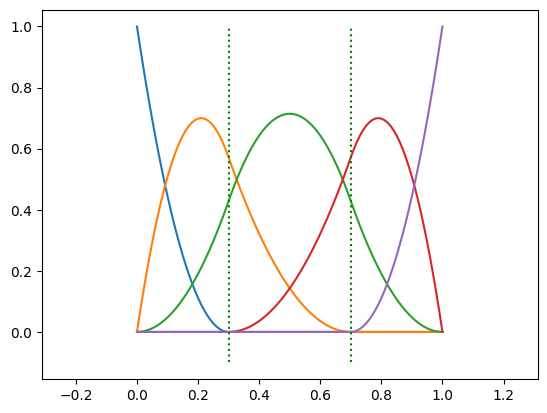

In [3]:
bi = bspy.Spline(1, 1, [3], [5], [[0.0, 0.0, 0.0, 0.3, 0.7, 1.0, 1.0, 1.0]], [[0.0, 0.0, 0.0, 0.0, 0.0]])
for i in range(5):
    bi.coefs[0][i] = 1.0
    plt.plot(tValues, bi(tValues))
    bi.coefs[0][i] = 0.0
plt.plot([0.3, 0.3], [-0.1, 1.0], 'g', linestyle = ':')
plt.plot([0.7, 0.7], [-0.1, 1.0], 'g', linestyle = ':')
plt.axis('equal')

# BSpy is designed to work in any dimension

* Points can be represented as zero dimensional splines (i.e. with 0 independent variables)
* Curves can be represented as one dimensional splines
* Surfaces can be represented as two dimensional splines
* Volumetric solids can be represented as three dimensional splines

In [4]:
myPoint = bspy.Spline.point([1.0, 2.0, 3.0])
myPoint()

array([1., 2., 3.])

In [5]:
# Basic fitting can be accomplished with the `least_squares` method

def myFunction(t):
    return 1.0 + 0.25 * np.cos(6.0 * np.pi * t)
tValues = np.linspace(0.0, 1.0, 51)
xValues = [[myFunction(t) for t in tValues]]
mySpline = bspy.Spline.least_squares(tValues, xValues, tolerance = 0.001)
print(mySpline)

Spline(1, 1, (4,), (22,), (array([0.       , 0.       , 0.       , 0.       , 0.0625   , 0.125    ,
       0.1875   , 0.25     , 0.3125   , 0.375    , 0.4375   , 0.5      ,
       0.515625 , 0.5234375, 0.53125  , 0.5625   , 0.625    , 0.6875   ,
       0.75     , 0.8125   , 0.875    , 0.9375   , 1.       , 1.       ,
       1.       , 1.       ]),) [[1.24996475 1.25224921 1.12006833 0.77697982 0.70796513 0.99999611
  1.29204425 1.22300505 0.8799615  0.73117493 0.75795927 0.7717875
  0.810252   0.93712147 1.22299919 1.29204904 0.99999332 0.70796671
  0.77697887 1.12006905 1.25224883 1.24996479]], {})


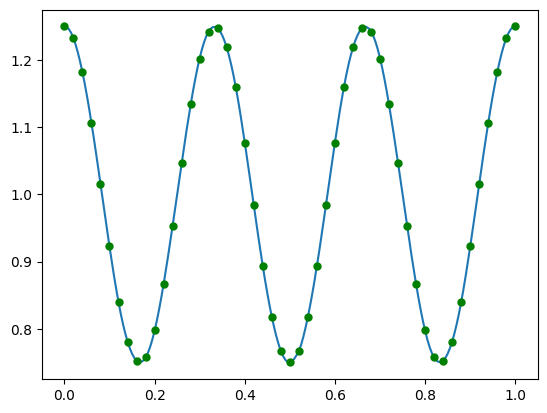

In [6]:
tPlot = np.linspace(0.0, 1.0, 201)
xPlot = mySpline(tPlot)
plt.plot(tPlot, xPlot)
plt.plot(tValues, xValues[0], 'g', marker = 'o', markersize = 5, linestyle = "")

(-0.062498237743659424,
 1.3124629926168494,
 -0.062498239479337504,
 1.3124630290660875)

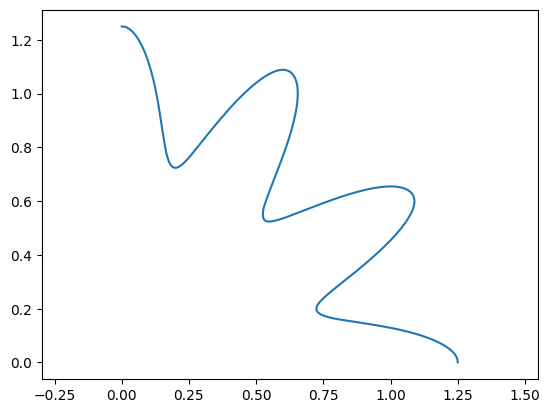

In [7]:
# Spline arithmetic is supported

myCurve = mySpline * bspy.Spline.circular_arc(1.0, 90.0)
xPlot, yPlot = myCurve(tPlot)
plt.plot(xPlot, yPlot)
plt.axis('equal')

In [8]:
flower = myCurve.revolve(360.0)
viewer = bspy.Viewer()
viewer.draw(flower, 'flower')
viewer.mainloop()

(0.24999999999999994, 1.35, -0.05, 1.05)

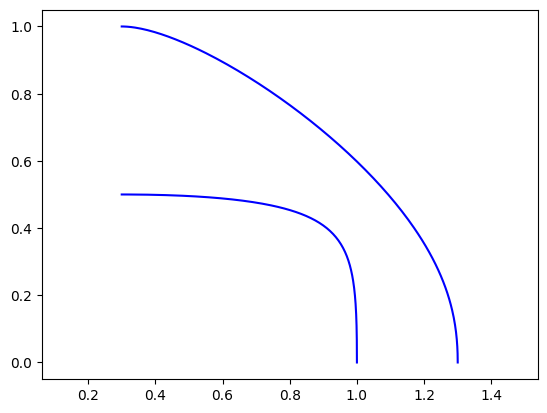

In [9]:
outerSection = bspy.Spline.section([[1.3, 0.0, 90.0, 1.0], [0.3, 1.0, 180.0, 5.0]])
innerSection = bspy.Spline.section([[1.0, 0.0, 90.0, 0.1], [0.3, 0.5, 180.0, 0.2]])
xOuter, yOuter = outerSection(tPlot)
xInner, yInner = innerSection(tPlot)
plt.plot(xOuter, yOuter, color = 'b')
plt.plot(xInner, yInner, color = 'b')
plt.axis('equal')

In [10]:
region2D = bspy.Spline.ruled_surface(outerSection, innerSection)
viewer = bspy.Viewer()
viewer.draw(region2D, 'region2D')
viewer.mainloop()

In [11]:
sweptVolume = region2D.revolve(120.0)
viewer = bspy.Viewer()
viewer.draw(sweptVolume, 'sweptVolume')
viewer.mainloop()

# Many interesting problems can be solved with contouring

* Consider

$$f:\mathbb{R}^n\to\mathbb{R}^{n-1}$$

* Want to solve

$$f(x)=0$$

* Typically has a one parameter family of solutions
* Want to find a mapping

$$x:[0,1]\to\mathbb{R}^n$$

* The problem is typically not well-posed

$$f(x(t))=0\quad\hbox{implies}\quad f(x(t^2))=0$$

# The problem can be made well-posed

* Need to solve

$$\begin{align}
f(x)&=0\cr
x'\cdot x''&=0\cr
\end{align}$$

(-0.05, 1.05, -0.00847098824910918, 0.17789075323129278)

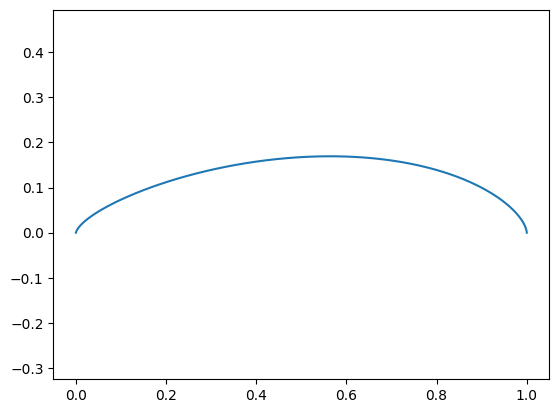

In [12]:
section1 = bspy.Spline.section([[0.0, 0.0, 75.0, -50.0], [1.0, 0.0, -85.0, -30.0]])
xPlot, yPlot = section1(tPlot)
plt.plot(xPlot, yPlot)
plt.axis("equal")

Spline(1, 2, (5,), (5,), (array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),) [[1.         1.21537802 1.33476777 1.42967646 1.5       ]
 [0.         0.80380172 0.89262951 0.80380172 0.        ]], {})


(0.975, 1.525, -0.03683184634835384, 0.7734687733154305)

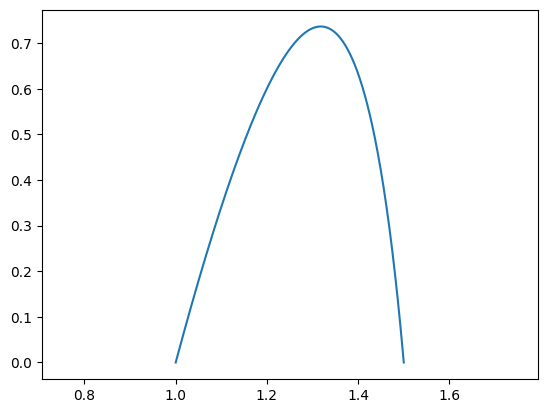

In [13]:
section2 = bspy.Spline.section([[1.0, 0.0, 75.0, -0.1], [1.5, 0.0, -85.0, -0.1]])
print(section2)
xPlot, yPlot = section2(tPlot)
plt.plot(xPlot, yPlot)
plt.axis("equal")

In [14]:
section1_3D = [[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]] @ section1
section2_3D = [[1.0, 0.0], [0.0, 0.0], [0.0, 1.0]] @ section2 + [0.0, 1.0, 0.0]
ruled = bspy.Spline.ruled_surface(section1_3D, section2_3D)
viewer = bspy.Viewer()
viewer.draw(ruled, 'ruled')
viewer.mainloop()

In [15]:
cValues = np.linspace(0.0, 1.0, 6)[1 : -1]
for v in cValues:
    for u in cValues:
        print(u, v, ruled.curvature([u, v]))

0.2 0.2 -0.9597824294699127
0.4 0.2 -0.1233656384205757
0.6000000000000001 0.2 -0.0984862860536217
0.8 0.2 -0.7064418884962377
0.2 0.4 -0.5790815065647824
0.4 0.4 -0.23984777136619562
0.6000000000000001 0.4 -0.15767857594060983
0.8 0.4 -0.40496179560369266
0.2 0.6000000000000001 -0.30934204961414724
0.4 0.6000000000000001 -0.4836476115543964
0.6000000000000001 0.6000000000000001 -0.25563405766327224
0.8 0.6000000000000001 -0.22886966491090996
0.2 0.8 -0.16360451297564002
0.4 0.8 -0.9331478138151698
0.6000000000000001 0.8 -0.40829654856059133
0.8 0.8 -0.13258219984557776


# Developable surfaces can be created with contouring

* Need to have $c_1'(u)$, $c_2'(v)$, $c_1(u)-c_2(v)$ be coplanar for all values of $u$ and $v$
* This can be achieved by solving

$$\det\left|c_1'(u)\quad c_2'(v)\quad c_1(u)-c_2(v)\right|=0$$

* This can be rewritten as

$$c_1'(u)\times c_2'(v)\cdot(c_1(u)-c_2(v))=0$$

In [16]:
section1_tan = section1_3D.differentiate()
section2_tan = section2_3D.differentiate()
s1xs2 = section1_tan.multiply(section2_tan, productType = 'C')
s1ms2 = section1_3D.subtract(section2_3D)
determinant = s1xs2 @ s1ms2
print(determinant)

Spline(2, 1, (8, 8), (8, 8), (array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])) [[[ 1.11022302e-16 -5.75121229e-02 -1.00490685e-01 -1.37613157e-01
   -1.77557010e-01 -2.28999715e-01 -3.00618743e-01 -4.01091565e-01]
  [ 3.13900062e+00  1.84011714e+00  8.66838017e-01  8.38288432e-02
   -6.44244797e-01 -1.45271732e+00 -2.47692313e+00 -3.85219665e+00]
  [ 4.91896291e+00  2.95797171e+00  1.48841152e+00  3.09435575e-01
   -7.79802910e-01 -1.98015071e+00 -3.49245460e+00 -5.51756135e+00]
  [ 5.53896950e+00  3.39476814e+00  1.78777650e+00  5.01482773e-01
   -6.80624845e-01 -1.97505816e+00 -3.59832898e+00 -5.76694912e+00]
  [ 5.19810303e+00  3.24922298e+00  1.78847962e+00  6.22246172e-01
   -4.43104100e-01 -1.60119795e+00 -3.04566214e+00 -4.97012342e+00]
  [ 4.09544613e+00  2.62005279e+00  1.51406754e+00  6.34001505e-01
   -1.63634170e-01 -1.02232835e+00 -2.08556990e+00 -3.49684769e+00]
  [ 2.43008143

original [0. 0. 0. 0. 1. 1. 1. 1.] [0.21132487 0.78867513]
refined [0.  0.  0.  0.  0.5 0.5 1.  1.  1.  1. ] [0.10566243 0.39433757 0.60566243 0.89433757]
refined [0.   0.   0.   0.   0.25 0.25 0.5  0.5  0.75 0.75 1.   1.   1.   1.  ] [0.05283122 0.19716878 0.30283122 0.44716878 0.55283122 0.69716878
 0.80283122 0.94716878]
refined [0.    0.    0.    0.    0.125 0.125 0.25  0.25  0.375 0.375 0.5   0.5
 0.625 0.625 0.75  0.75  0.875 0.875 1.    1.    1.    1.   ] [0.02641561 0.09858439 0.15141561 0.22358439 0.27641561 0.34858439
 0.40141561 0.47358439 0.52641561 0.59858439 0.65141561 0.72358439
 0.77641561 0.84858439 0.90141561 0.97358439]
refined [0.     0.     0.     0.     0.0625 0.0625 0.125  0.125  0.1875 0.1875
 0.25   0.25   0.3125 0.3125 0.375  0.375  0.4375 0.4375 0.5    0.5
 0.5625 0.5625 0.625  0.625  0.6875 0.6875 0.75   0.75   0.8125 0.8125
 0.875  0.875  0.9375 0.9375 1.     1.     1.     1.    ] [0.0132078 0.0492922 0.0757078 0.1117922 0.1382078 0.1742922 0.2007078
 0.236

(-0.049999999999999885, 1.05, -0.04999999999999338, 1.0499999999999996)

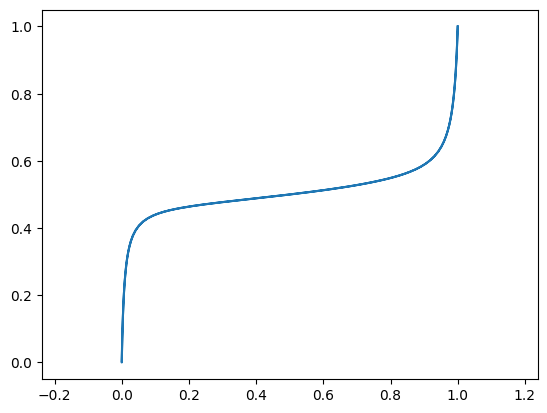

In [17]:
[u1u2] = determinant.contours()
u1, u2 = u1u2(tPlot)
plt.plot(u1, u2)
plt.axis('equal')

In [21]:
u1Fit, u2Fit = u1u2(tValues)
rulings = [bspy.Spline.line(section1_3D(u1), section2_3D(u2)) for u1, u2 in zip(u1Fit, u2Fit)]
viewer = bspy.Viewer()
for ruling in rulings:
    viewer.draw(ruling)
viewer.mainloop()

In [23]:
developable = bspy.Spline.least_squares(tValues, rulings, tolerance = 1.0e-1).transpose()
viewer = bspy.Viewer()
viewer.set_fill_color(developable, 0.1, 0.3, 0.9)
viewer.draw(developable, 'developable')
viewer.mainloop()

In [ ]:
viewer = bspy.Viewer()
viewer.draw(ruled)
viewer.draw(developable)
viewer.mainloop()

In [ ]:
for v in cValues:
    for u in cValues:
        print(u, v, gauss_curvature(developable, [u, v]))

(-0.8919414364365893,
 1.0900778517391772,
 -1.099999135033344,
 1.0999818357002216)

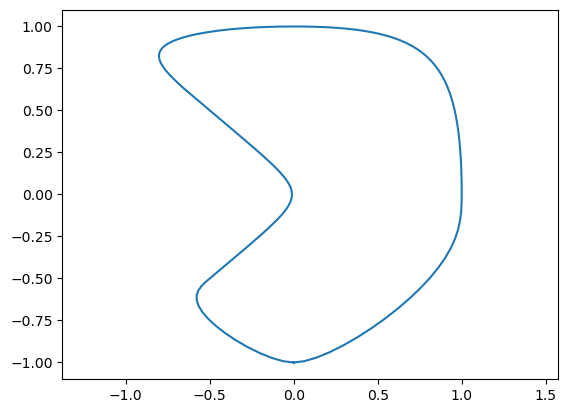

In [32]:
blob = bspy.Spline.section([[1.0, 0.0, 90.0, 0.2], [0.0, 1.0, 180.0, 0.2], [-0.5, 0.5, 320.0, 0.0],
                            [-0.5, -0.5, 220.0, 0.0], [0.0, -1.0, 0.0, 5.0], [1.0, 0.0, 90.0, 0.2]])
xBlob, yBlob = blob(tPlot)
plt.plot(xBlob, yBlob)
plt.axis('equal')

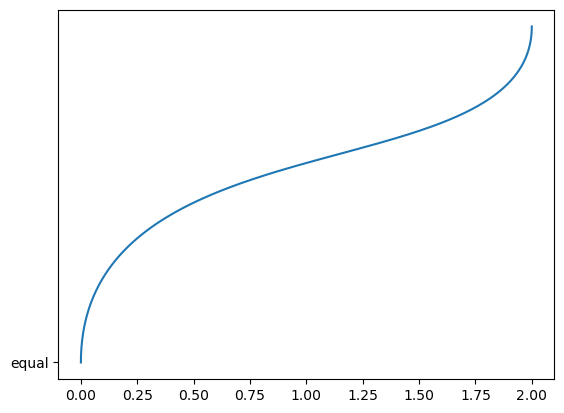

In [33]:
trajectory = bspy.Spline(1, 2, [4], [4], [[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]],
                         [[0.0, 0.0], [0.0, 1.5], [2.0, 1.0], [2.0, 2.0]])
xT, yT = trajectory(tPlot)
plt.plot(xT, yT)
plt.plot('equal')

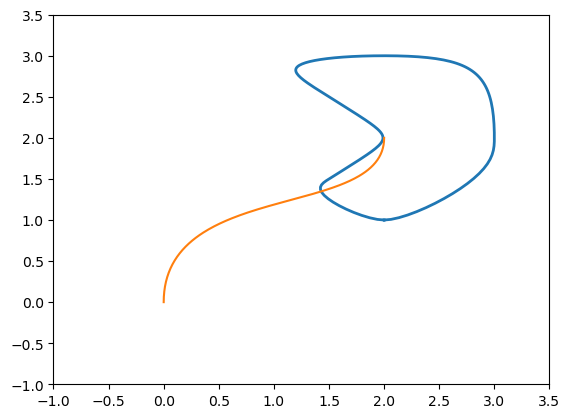

In [34]:
fig, ax = plt.subplots()
ax.set_xlim((-1, 3.5))
ax.set_ylim((-1, 3.5))
line, = ax.plot([], [], lw=2)
ax.plot(xT, yT)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially

def animate(i):
    xPlot = xBlob + xT[i]
    yPlot = yBlob + yT[i]
    line.set_data(xPlot, yPlot)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=201, interval=20, blit=True)
HTML(anim.to_html5_video())

In [35]:
blob_u = blob.differentiate()
blob_t = trajectory.differentiate()
blob_tangents = blob_u.multiply(blob_t, productType = 'C')
bottomValues = blob_tangents.contract([None, 0.0]).zeros()
middleValues = blob_tangents.contract([None, 0.5]).zeros()
topValues = blob_tangents.contract([None, 1.0]).zeros()
ut1 = bspy.Spline.contour(blob_tangents, [[bottomValues[-2], 0.0], [middleValues[-2], 0.5], [topValues[-2], 1.0]])
ut2 = bspy.Spline.contour(blob_tangents, [[bottomValues[-1], 0.0], [middleValues[-1], 0.5], [topValues[-1], 1.0]])
uValues, timeValues = ut1(tValues)
envelopePoints = np.array([blob(uValue) + trajectory(timeValue) for uValue, timeValue in zip(uValues, timeValues)]).T
envelope1 = bspy.Spline.least_squares(tValues, envelopePoints)
uValues, timeValues = ut2(tValues)
envelopePoints = np.array([blob(uValue) + trajectory(timeValue) for uValue, timeValue in zip(uValues, timeValues)]).T
envelope2 = bspy.Spline.least_squares(tValues, envelopePoints)

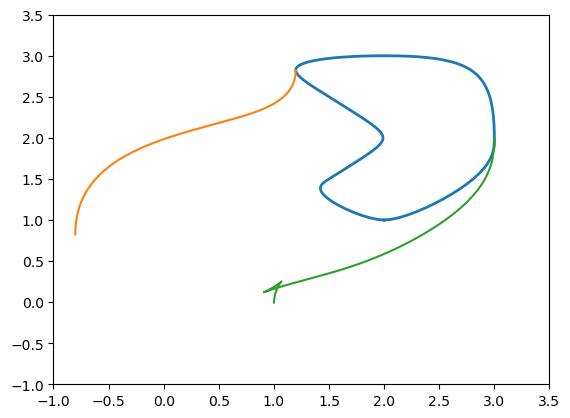

In [36]:
fig, ax = plt.subplots()
ax.set_xlim((-1, 3.5))
ax.set_ylim((-1, 3.5))
line, = ax.plot([], [], lw=2)
xV1, yV1 = envelope1(tPlot)
ax.plot(xV1, yV1)
xV2, yV2 = envelope2(tPlot)
ax.plot(xV2, yV2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially

def animate(i):
    xPlot = xBlob + xT[i]
    yPlot = yBlob + yT[i]
    line.set_data(xPlot, yPlot)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=201, interval=20, blit=True)
HTML(anim.to_html5_video())